*The objective of this challenge is*:
> To create a machine learning model to predict how much a client will claim from Zimnat per month for a whole year. 


<a name="Libraries"></a>
## 1. Importing libraries


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a name="Data"></a>
## 2. Loading data

In [ ]:
# Load files
train = pd.read_csv('train.csv')
policies = pd.read_csv('policies.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.00000,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00000
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.00000,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24000
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.00000,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50000
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.00000,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67000
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.00000,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64000


In [ ]:
# Preview policies dataset
policies.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [ ]:
# Preview test dataset
test.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.00000,prod00005,ag00068,cob00009,rt00032,2021-03-11,ct0003,rf0001,pc0007,sc00029,br00004
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.00000,prod00015,ag00064,cob00034,rt00023,2020-06-25,ct0001,rf0003,pc0007,sc00022,br00002
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.00000,prod00012,ag00021,cob00016,rt00015,2019-03-14,ct0001,rf0001,pc0011,sc00049,br00001
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.00000,prod00002,ag00037,cob00002,rt00002,2018-12-04,ct0001,rf0002,pc0002,sc00012,br00005
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.00000,prod00015,ag00037,cob00034,rt00023,2019-09-18,ct0001,rf0003,pc0007,sc00022,br00002


In [ ]:
# Preview sample submission file
samplesubmission.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,0
1,ID_GTE9ZUJ9GZ97,0
2,ID_RUVIYRKWZ4RG,0
3,ID_J81X8SWU6JYN,0
4,ID_94NM3JJAWWOQ,0


In [ ]:
# Check size and shape of datasets
train.shape, policies.shape, test.shape, samplesubmission.shape

((9376, 15), (30371, 10), (4019, 14), (4019, 2))

<a name="Statistics"></a>
## 3. Statistical summaries

In [ ]:
# Train statistical summary
train.describe(include = 'all')

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
count,9376,9290,9376,9376.00000,9376,9376,9376,9376,9376,9376,9376,9376,9376,9376,9376.00000
unique,9376,4076,9167,NaN,37,8,37,50,1359,3,5,21,74,11,NaN
top,ID_JZ7QWRHH57RO,pol000006026,claim0001351,NaN,prod00015,ag00037,cob00034,rt00023,2019-08-20,ct0001,rf0002,pc0007,sc00023,br00002,NaN
freq,1,254,3,NaN,4411,3114,3608,3771,83,6096,4853,7396,2980,3900,NaN
mean,NaN,NaN,NaN,8534789.61723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41464.71125
std,NaN,NaN,NaN,112556487.28996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208434.71755
min,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,NaN,NaN,NaN,6500.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.92500
50%,NaN,NaN,NaN,50542.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.92500
75%,NaN,NaN,NaN,420000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12700.64250


From the above statistical summary, we can deduce some of the following insights:
 - The minimum amount claimed is 0 and the maximum is 7868590.62000
 - There are 11 different branches
 - Majority of the training features are categorical in nature

In [ ]:
# Policies statistical summary
policies.describe(include = 'all', datetime_is_numeric=True)

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
count,30371,30371,30371,30371,30371,30371,30325,30371,30371,30371
unique,5217,37,20836,1431,1369,223,37,3,5,11
top,pol000005951,prod00005,2020-07-01 08:45:55.653,2018-02-01 00:00:00.000,2019-01-31 00:00:00.000,ag00226,cob00031,ct0001,rf0001,br00002
freq,174,9994,14,1122,1463,4620,7755,16747,14184,13636


## 4. Data Cleaning

a) Missing values and duplicates

In [ ]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any(), policies.isnull().sum().any()

(True, True, True)

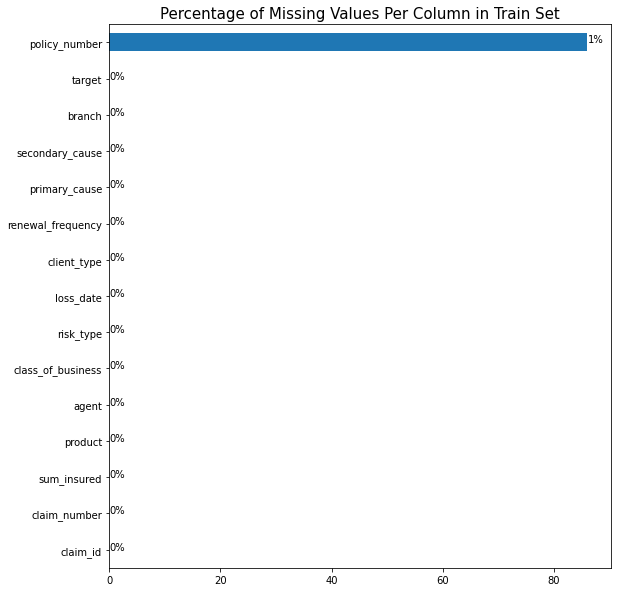

In [ ]:
# Plot missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Suggestions on how to handle missing values:
 - Fill in missing values with mode, mean, median..
 - Drop Missing datapoints with missing values

In [ ]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any(), policies.duplicated().any()

(False, False, False)

b) Outliers

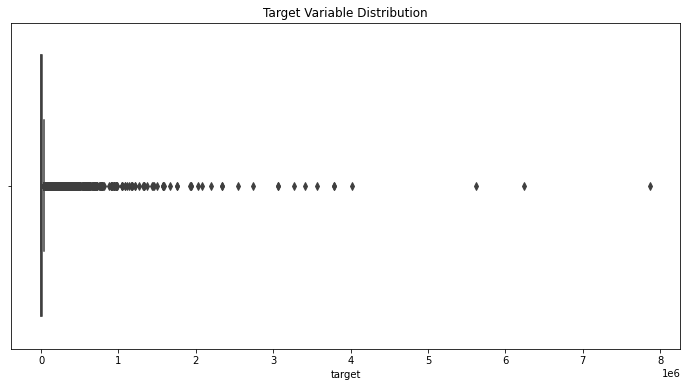

In [ ]:
# A box plot showing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(train.target)
plt.title('Target Variable Distribution');

c) Dataset datatypes

In [ ]:
# Train dataset datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           9376 non-null   object 
 1   policy_number      9290 non-null   object 
 2   claim_number       9376 non-null   object 
 3   sum_insured        9376 non-null   float64
 4   product            9376 non-null   object 
 5   agent              9376 non-null   object 
 6   class_of_business  9376 non-null   object 
 7   risk_type          9376 non-null   object 
 8   loss_date          9376 non-null   object 
 9   client_type        9376 non-null   object 
 10  renewal_frequency  9376 non-null   object 
 11  primary_cause      9376 non-null   object 
 12  secondary_cause    9376 non-null   object 
 13  branch             9376 non-null   object 
 14  target             9376 non-null   float64
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


In [ ]:
# Convert datetime variables to datetime objects
train.loss_date = pd.to_datetime(train.loss_date, errors='coerce')

# Confirm that the dates have been converted successfully 
train.loss_date.describe()

count                    9376
unique                   1359
top       2019-08-20 00:00:00
freq                       83
first     2018-01-01 00:00:00
last      2021-10-22 00:00:00
Name: loss_date, dtype: object

In [ ]:
# Convert categorical variables to categorical objects
cat_cols = train.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).tolist()

# Preview categorical variables
train[cat_cols].head()

,agent,branch,claim_number,class_of_business,client_type,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause
0,ag00068,br00006,claim0011359,cob00031,ct0003,pol000009680,pc0007,prod00027,rf0001,rt00006,sc00022
1,ag00226,br00002,claim0005272,cob00010,ct0003,pol000006869,pc0007,prod00005,rf0001,rt00032,sc00023
2,ag00037,br00002,claim0004147,cob00010,ct0003,pol000006135,pc0007,prod00029,rf0001,rt00026,sc00024
3,ag00037,br00001,claim0009962,cob00009,ct0003,pol000008991,pc0007,prod00005,rf0001,rt00032,sc00021
4,ag00226,br00001,claim0007346,cob00034,ct0001,pol000007768,pc0007,prod00015,rf0001,rt00023,sc00021


In [ ]:
# Fill in missing values in categorical variables with the most common
train[cat_cols] = train[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  train[col] = train[col].astype('category')

# Confirm
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           9376 non-null   object        
 1   policy_number      9376 non-null   category      
 2   claim_number       9376 non-null   category      
 3   sum_insured        9376 non-null   float64       
 4   product            9376 non-null   category      
 5   agent              9376 non-null   category      
 6   class_of_business  9376 non-null   category      
 7   risk_type          9376 non-null   category      
 8   loss_date          9376 non-null   datetime64[ns]
 9   client_type        9376 non-null   category      
 10  renewal_frequency  9376 non-null   category      
 11  primary_cause      9376 non-null   category      
 12  secondary_cause    9376 non-null   category      
 13  branch             9376 non-null   category      
 14  target  

<a name="Engineering"></a>
## 7. Feature engineering

In [ ]:
# Extract day, month and year from the loss date column
# day
train['loss_date_day'] = train.loss_date.dt.day

# month
train['loss_date_month'] = train.loss_date.dt.month
 
# year
train['loss_date_year'] = train.loss_date.dt.year

# Preview engineered date features
train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()

,loss_date,loss_date_day,loss_date_month,loss_date_year
0,2021-05-13,13,5,2021
1,2018-05-13,13,5,2018
2,2018-08-18,18,8,2018
3,2018-12-20,20,12,2018
4,2018-11-07,7,11,2018


## 8.  EDA

a) Date features

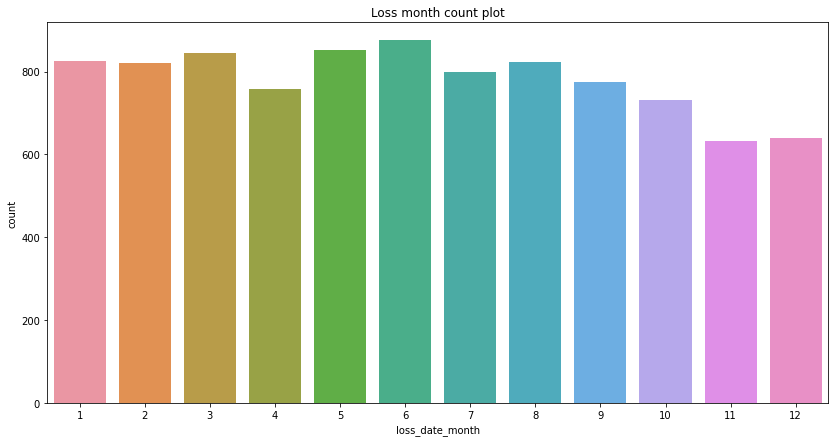

In [ ]:
# Loss month countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'loss_date_month', data = train)
plt.title('Loss month count plot')
plt.show()

- June has the highest number of claims and December has the least number of claims

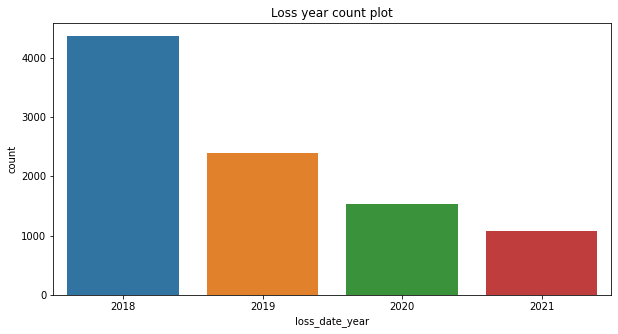

In [ ]:
# Loss year countplot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'loss_date_year', data = train)
plt.title('Loss year count plot')
plt.show()

- Most of the claims were done in the year 2018 and the least in the year 2021

b) Branch features 

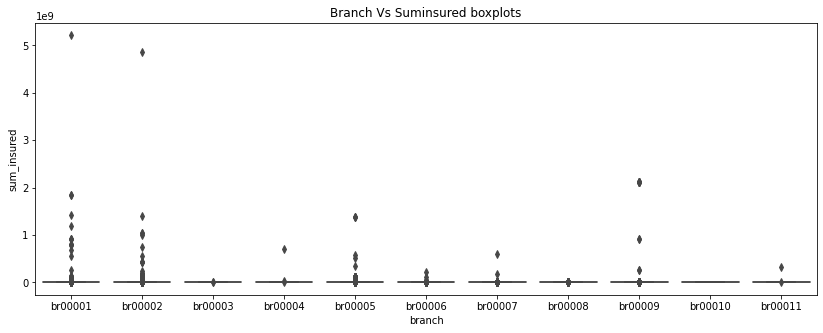

In [ ]:
plt.figure(figsize = (14, 5))
sns.boxplot(x = 'branch', y = 'sum_insured', data = train)
plt.title('Branch Vs Suminsured boxplots')
plt.show()

- Branch 1 and 2 seem to have the highest number of outliers in the sum insured variable.
- This outliers might affect model performance, so its best to handle them

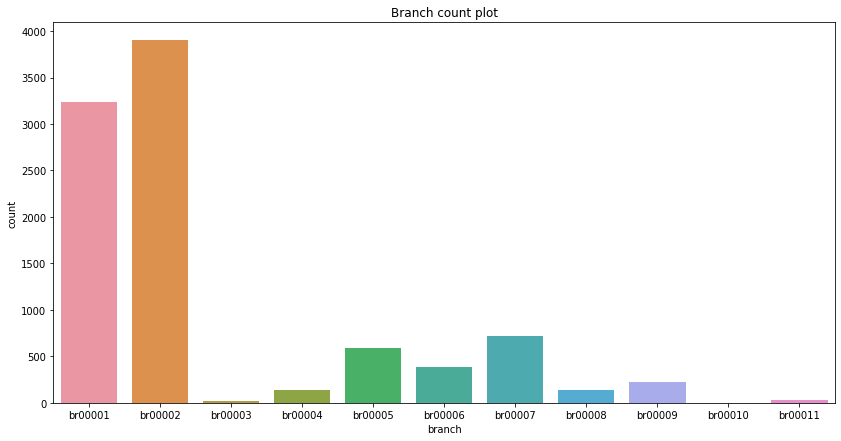

In [ ]:
# Branch countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'branch', data = train)
plt.title('Branch count plot')
plt.show()

 - Most of the claims are concentrated in branch1 and branch2, so when modelling and creating new features, try to balance out the features to avoid overfitting

## 9.  Preprocess test dataset

Categorical features

In [ ]:
# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])

# Preview engineered train dataset
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,loss_date_day,loss_date_month,loss_date_year
0,ID_JZ7QWRHH57RO,3070,7439,300000.00000,26,4,30,5,2021-05-13,2,0,6,20,5,82150.00000,13,5,2021
1,ID_KQ5TJMVLJ4EP,1126,3469,16000.00000,4,7,9,31,2018-05-13,2,0,6,21,1,3780.24000,13,5,2018
2,ID_NYHI7WJGGIAE,630,2799,3000.00000,28,1,9,25,2018-08-18,2,0,6,22,1,2196.50000,18,8,2018
3,ID_ROMMDCXYUXN5,2546,6448,6000.00000,4,1,8,31,2018-12-20,2,0,6,19,0,105.67000,20,12,2018
4,ID_2OTD9NX8L73D,1767,4832,26850.00000,14,7,32,22,2018-11-07,0,0,6,19,0,1605.64000,7,11,2018


In [ ]:
# Convert datetime variables to datetime objects
test.loss_date = pd.to_datetime(test.loss_date, errors='coerce')

# Fill in missing values in categorical variables with the most common
test[cat_cols] = test[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  test[col] = test[col].astype('category')

# Extract day, month and year from the loss date column
test['loss_date_day'] = test.loss_date.dt.day #day

test['loss_date_month'] = test.loss_date.dt.month #month
 
test['loss_date_year'] = test.loss_date.dt.year #year

# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  test[col] = le.fit_transform(test[col])

# Preview engineered test dataset
test.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,loss_date_day,loss_date_month,loss_date_year
0,ID_4RO0KZI9BBW2,739,1667,300000.00000,4,4,8,29,2021-03-11,2,0,6,26,3,11,3,2021
1,ID_GTE9ZUJ9GZ97,312,883,2700000.00000,12,3,28,20,2020-06-25,0,2,6,20,1,25,6,2020
2,ID_RUVIYRKWZ4RG,917,1895,4071352.00000,10,0,14,14,2019-03-14,0,0,9,43,0,14,3,2019
3,ID_J81X8SWU6JYN,2081,3852,0.00000,1,1,1,1,2018-12-04,0,1,1,10,4,4,12,2018
4,ID_94NM3JJAWWOQ,257,507,1607178.00000,12,1,28,20,2019-09-18,0,2,6,20,1,18,9,2019


## 10.  Modelling

In [ ]:
# Select main columns to be used in training
main_cols = train.columns.difference(['claim_id', 'loss_date', 'target']).tolist()
X = train[main_cols]
y = train.target


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

a) Linear Regression

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the MAE score of the model
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

LinearRegression MAE score on the X_test is: 58703.297374471476


b) More models

In [ ]:
pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor 
import lightgbm as lgb

In [ ]:
#Creating model2
rnfreg_model = RandomForestRegressor()
linearreg_model = LinearRegression()
knnreg_model = KNeighborsRegressor()
dtreg_model = DecisionTreeRegressor()
svrreg_model = SVR()
xgbreg_model = XGBRegressor()
ctb_model = CatBoostRegressor()
gbreg_model = GradientBoostingRegressor()
abreg_model = AdaBoostRegressor()
breg_model = BaggingRegressor()
lgbm = lgb.LGBMRegressor()

#training model
rnfreg_model.fit(X_train, y_train) 
linearreg_model.fit(X_train, y_train)
knnreg_model.fit(X_train, y_train)
dtreg_model.fit(X_train, y_train)
svrreg_model.fit(X_train, y_train)
xgbreg_model.fit(X_train, y_train) 
ctb_model.fit(X_train, y_train) 
gbreg_model.fit(X_train, y_train) 
abreg_model.fit(X_train, y_train) 
breg_model.fit(X_train, y_train) 
lgbm.fit(X_train, y_train) 

[13:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.055117
0:	learn: 220768.5323232	total: 49.7ms	remaining: 49.6s
1:	learn: 218554.7357476	total: 52.1ms	remaining: 26s
2:	learn: 216012.4388718	total: 54.4ms	remaining: 18.1s
3:	learn: 213843.2759299	total: 56.8ms	remaining: 14.1s
4:	learn: 211789.7872192	total: 59.1ms	remaining: 11.8s
5:	learn: 209807.6521724	total: 61.4ms	remaining: 10.2s
6:	learn: 208090.3722384	total: 63.7ms	remaining: 9.04s
7:	learn: 206493.9366194	total: 65.9ms	remaining: 8.18s
8:	learn: 204791.4407214	total: 68.2ms	remaining: 7.51s
9:	learn: 203312.3465950	total: 70.4ms	remaining: 6.97s
10:	learn: 201729.7351820	total: 72.9ms	remaining: 6.56s
11:	learn: 199828.4610661	total: 75.5ms	remaining: 6.22s
12:	learn: 198164.0938376	total: 77.8ms	remaining: 5.91s
13:	learn: 196965.4415802	total: 80.5ms	remaining: 5.67s
14:	learn: 195628.2218971	total: 83.1ms	remaining: 5.46s


LGBMRegressor()

In [ ]:
# Make predictions
rnf_pred = rnfreg_model.predict(X_test)
lr_pred = linearreg_model.predict(X_test)
knn_pred = knnreg_model.predict(X_test)
dt_pred = dtreg_model.predict(X_test)
svr_pred = svrreg_model.predict(X_test)
xgb_pred = xgbreg_model.predict(X_test)
ctb_pred = ctb_model.predict(X_test)
gb_pred = gbreg_model.predict(X_test)
ab_pred = abreg_model.predict(X_test)
bg_pred = breg_model.predict(X_test)
lgbm_pred = lgbm.predict(X_test)

In [ ]:
# Check the MAE score of the model
print('RandomForestRegressor: ', mean_absolute_error(y_test, rnf_pred))
print('LinearRegression: ', mean_absolute_error(y_test, lr_pred))
print('KNeighborsRegressor: ', mean_absolute_error(y_test, knn_pred))
print('DecisionTreeRegressor: ', mean_absolute_error(y_test, dt_pred))
print('SVR: ', mean_absolute_error(y_test, svr_pred))
print('XGBRegressor: ', mean_absolute_error(y_test, xgb_pred))
print('CatBoostRegressor: ', mean_absolute_error(y_test, ctb_pred))
print('GradientBoostingRegressor: ', mean_absolute_error(y_test, gb_pred))
print('AdaBoostRegressor: ', mean_absolute_error(y_test, ab_pred))
print('BaggingRegressor: ', mean_absolute_error(y_test, bg_pred))
print('LGBMRegressor: ', mean_absolute_error(y_test, lgbm_pred))

RandomForestRegressor:  45894.30267003199
LinearRegression:  58703.297374471476
KNeighborsRegressor:  52983.67798435834
DecisionTreeRegressor:  52554.83294703163
SVR:  38716.61364162081
XGBRegressor:  44937.531114020196
CatBoostRegressor:  45814.6688807779
GradientBoostingRegressor:  46121.284423788966
AdaBoostRegressor:  205773.31451004802
BaggingRegressor:  47269.306120867404
LGBMRegressor:  48839.01845586539


#### Hyperparameter Tuning:

a) random forest

In [ ]:
for max_depth in [3, 5, 8, 10, 14, 18, 25, 30]:
    model = RandomForestRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)
    print(max_depth, mean_absolute_error(y_test, model.predict(X_test)))

3 46115.64939246356
5 46445.05408105226
8 46595.578463419835
10 46003.94525773195
14 46987.17218098116
18 45827.92715087096
25 47237.68278023463
30 46960.16305499467


In [ ]:
rf = RandomForestRegressor(max_depth=18)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=18)

b) xgb

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb1 = XGBRegressor()

# Define hyperparameters
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 10, 15],
              'min_child_weight': [4, 8, 12],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

# Grid search object
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
0.11092811989315149
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 12, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
# Fit a model on the whole training set, using our best parameters
xgb = XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=5,min_child_weight=12,n_estimators=500,nthread= 4,silent=1,subsample=0.7)
xgb.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=5,
             min_child_weight=12, n_estimators=500, nthread=4, silent=1,
             subsample=0.7)

## 11. Making predictions of the test set and creating a submission file

In [ ]:
# Make prediction on the test set using model of choice:
test_df = test[main_cols]
predictions = xgb.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

In [ ]:
# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file.target)
plt.title('Predictions Data Distribution');

In [ ]:
# Preview the sub_file
sub_file.head()

In [ ]:
# Write to csv file to submit to Zindi
sub_file.to_csv("zim_xgb_b.csv", index = False)

Ny best submission in the zindi leaderboard was with:

The svr model